In [19]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-10 22:48:54,903: Credentials are already in use. The existing account in the session will be replaced.


In [41]:
from qiskit import *
def dj(n, case, bstring):
    qc = QuantumCircuit(n+1, n)
    qc.x(n)
    for i in range(n+1):
        qc.h(i)
    oracle(qc, n, case, bstring)
    for i in range(n):
        qc.h(i)
        qc.measure(i,i)
    return qc
def oracle(qc, n, case, bstring):
    #let case 1 be f(x)=0, case 2 is f(x)=1, case 3 is f(x)=x, case 4 is f(x)=!x
    if(case == 2):
        qc.x(n)
    elif(case == 3):
        for i in range(n):
            if bstring[i] == '1':
                qc.x(i)
            qc.cx(i,n)
            if bstring[i] == '1':
                qc.x(i)
    elif(case == 4):
        for i in range(n):
            if bstring[i]=='1':
                qc.x(i)
            qc.cx(i, n)
            if bstring[i]=='1':
                qc.x(i)
        qc.x(n)

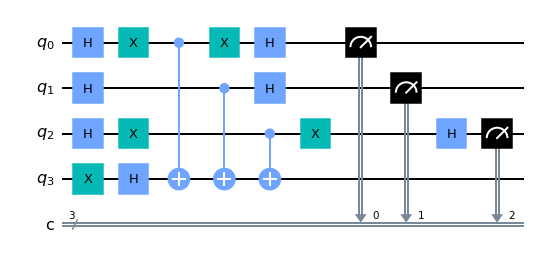

In [42]:
circ = dj(3, 3, "101")
circ.draw('mpl')

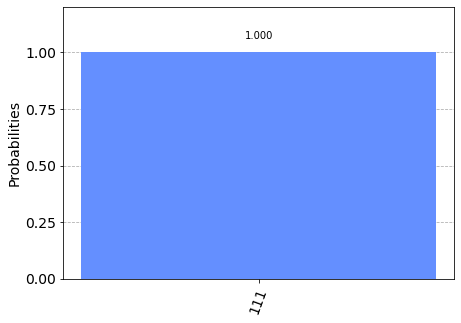

In [43]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ, backend, shots = 1024)
counts = job.result().get_counts()
plot_histogram(counts)